<a href="https://colab.research.google.com/github/Joepiea/LABtelecoma/blob/main/Kopie_van_Telecomm_labday1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#![picture one](http://drive.google.com/uc?export=view&id=1THNFEYjgj5RkrxAASCYq0y54FpCZ2tDs)
<p align="center">


[Practicum Content](https://colab.research.google.com/drive/1h44SSQ26z7SwVzRTF5KhoMLsqFlmo3SX?usp=sharing) |[Python Handbook](https://colab.research.google.com/drive/16jSnM5LCnNkF6as5o0ss6CnWOoM_Ah3D?usp=sharing#scrollTo=2o0C4AKI8Fw8) | [Brightspace page](https://brightspace.tudelft.nl/d2l/home/499681)

Authors: Alle-Jan van der Veen, Emiel van Veldhuijzen, Bahareh Abdi, Last update: 13/02/2023

# **Labday 1: Convolution**

In this labday, you will study time-domain signals and apply basic filters via convolution.  You have seen the definition
of a convolution, but what does it really do? And how can you interprete the impulse response of a digital
filter?

The specific topics you'll learn in this labday are: basic filtering in time-domain, insight in convolution, correlation as a convolution.
We will test this on audio signals, so you'll need a PC with a built-in loudspeaker.

You have to complete the code or text cells indicated with   <font color=green>`# your code here` or <font color=#6698FF> `# your description here`. <font color=black> Moreover, at the end of some sections you will see <font color=#6698FF> `# report here`  <font color=black> where you have to summarize the results of that section and report on your results. Note that the descriptions and reporting of your observations, reasoning and results are very important while grading your notebooks.

**Importing required libraries and downloading files**

Before we start, we should import some packages which we will be using throughout the colab. Links to their respective documentation is provided and should be reviewed first if any problems arise.
* Numpy ([docs](https://numpy.org/doc/stable/)) - used for numerical operations
* Matplotlib ([docs](https://matplotlib.org/stable/index.html)) - used for making graphs
* SciPy ([docs](https://docs.scipy.org/doc/scipy/)) - used for signal processing

Other packages may be used, but all exercises can be done with the packages mentioned above.


In [ ]:
# Modules
import matplotlib.pyplot as plt           # For plotting purposes
import numpy as np                        # For convolution function
from scipy.io import wavfile              # For loading wav file
from scipy import signal                  # For filter function
import math                               # For numerical approximation of pi
from IPython.display import Image         # For loading image
from IPython.display import Audio         # For playing wav file
from IPython.display import YouTubeVideo  # To play youtube link
from scipy.io.wavfile import write        # To convert data into wav file

In [ ]:
# Plot settings for all figures, only for the colab including the solutions
plt.rcParams.update({'font.size': 12})    # Plot setting to enlarge the fontsize for the whole colab file

In [ ]:
# downloading the required files
!gdown 1kl6K04MidIM76DS26Xxeym2sFkOiivz2 # sound wave train.wav

Downloading...
From: https://drive.google.com/uc?id=1kl6K04MidIM76DS26Xxeym2sFkOiivz2
To: /content/train.wav
100% 25.8k/25.8k [00:00<00:00, 28.0MB/s]



## 1.1 Convolution

**Theory**

In this exercise, we look at the effect of a convolution on a time-discrete signal $x[n]$. You have learned that an LTI system (filter) is described by an impulse response $h[n]$, and the output of the filter is written as $y = h*x$, or often (mathematically not entirely correct) $y[n] = h[n]*x[n]$, which is defined as:
$$y[n] =\sum_{k=-∞}^{∞} h[k]x[n-k]$$

If the filter has finite impulse response (FIR) and is causal, then $h[k]$ is nonzero only for $k ={0,...,N_h-1}$, where $N_h$ is the “length” of the filter, and this becomes:
$$y[n] =\sum_{k=0}^{N_h-1} h[k]x[n-k]$$

The question is: what does this equation mean? One interpretation is that we can write
$$y[n] = h[0]x[n]+h[1]x[n-1]+...+h[N_h-1]x[n-N_h+1]$$
Thus, the response $y[n]$ consists of scaled and delayed copies of $x[n]$. The delayed copies can be interpreted as echo’s of the original signal $x[n]$.

In Python, the available samples of $x[n]$ are stored in a vector `x`; obviously we can take only a finite length sequence here. Standard Python indexing of a vector starts with n = 0, thus, a vector x is interpreted as
`x = [x[0],x[1],...,x[Nx-1]]`
But suppose we need a different time range? The only option is to define, along with `x`, a time-index vector `nx` that in the above case is: `nx = [0,1,..,Nx-1]`, but in other cases could be a different vector. 

With the time-axis properly defined, we can then create a "stick" plot using `stem(nx,x)`. If you have a large number of samples, it is usually more clear to plot a continuous line using `plot(nx,x)`.

In many cases, a discrete time-domain signal is obtained by sampling an analog time-domain signal, at
a rate determined by the sampling frequency $F_s$ in hertz (or samples per second). The corresponding
sampling period is $T_s = 1/F_s$, in seconds. For example, if $F_s = 40$ kHz, then $T_s = 25$ μs. You can plot the
time-series with the proper time-axis using `plot(n*Ts,x)`.




**Python functions to perform convolution**

Python functions for convolutions are:
1.  [numpy.convolve](https://numpy.org/doc/stable/reference/generated/numpy.convolve.html):`y = np.convolve(x,h)` 
2.  [scipy.signal.lfilter](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.lfilter.htmlFiltering): `y = signal.lfilter(b,a,x)`


The first form corresponds to an FIR filtering where the FIR filter coefficients $h[n]$ are specified (stored in a vector h, also finite length). For an FIR filter, these coefficients are equal to its impulse response. 
The second form corresponds to $Y(z) = X(z)\frac{B(z)}{A(z) }$, and the filter coefficients of $B(z)$ and $A(z)$ are specified:
$$Y(z) = X(z)\frac{b_0+b_1z-1+...+b_Mz^{-M}}{a_0+a_1z-1+...+a_Nz^{-N}} \quad\Longleftrightarrow\quad \sum_{k=0}^{N}a_ky[n-k] = \sum_{k=0}^{M}b_ky[n-k]$$
If $A(z) = 1$, or `a = 1`, you obtain an FIR filter $H(z) = B(z)$.

Due to the convolution, signals generally get longer. With `np.convolve`, the standard option is that the tail part is included, whereas with `signal.lfilter`, the signal $y$ has the same number of entries as $x$, hence the tail is
truncated.




**Time Index**

Note that both functions do not accept a parameter that defines the time index. You will have to keep track of that yourself.

__Questions:__
* If a vector $x$ has $N_x$ samples and another vector $h$ has $N_h$ samples, how many samples will the convolution of $x$ and $h$, i.e. $y=x*h$ have? Try to reason it without using the function `numpy.convolve` yet!

<font color=#6698FF> # your description here


* If $x$ has time-index vector `nx = [a,a+1,...,b]` and $h$ has time-index vector `nh = [c,c+1,...,d]`, show that the proper time-index vector for $y$ is `ny = [a+c,...,b+d]`. Is this consistent with your answer for the length of $y$? 

<font color=#6698FF> # your description here



**Convolution Using `np.convolve`**

Now it is time to really try out convolution in practice! The code below defines two vectors $x$ and $h$ and plots them.

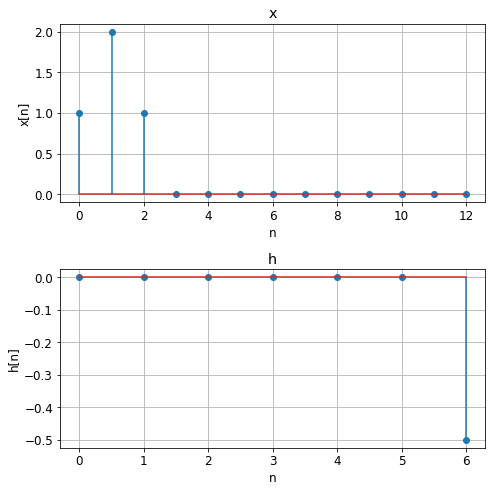

In [ ]:
# Example h vector
h = [0, 0, 0, 0, 0, 0, -0.5] 
Nh = len(h)
nh = list(range(0,Nh))  # runs from 0 to Nh-1

# Example x vector
x = [1, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] # Example vector
Nx = len(x)
nx = list(range(0,Nx))

# figure 
fig,a = plt.subplots(2,1, figsize=(7,7)) # define two subplots
a[0].stem(nx,x,use_line_collection=True)
a[0].set_title('x')
a[0].set_xlabel('n')
a[0].set_ylabel('x[n]')
a[1].stem(nh,h,use_line_collection=True)
a[1].set_title('h')
a[1].set_xlabel('n')
a[1].set_ylabel('h[n]')
fig.tight_layout()
a[0].grid()
a[1].grid()
plt.show()

Compute the convolution of $x$ and $h$ using `np.convolve` and plot it. Don't forget the time-index vector!

In [ ]:
# Numpy convolve built-in function
y = np.convolve()
# Support range of convolution of vectors x and h
ny = # your code here

# figure
plt.figure(figsize=(11,4)) # plot
plt.stem(ny,y,use_line_collection=True)
plt.title('$(x * h)[n]$')
plt.xlabel('n')
plt.ylabel('$(x * h)[n]$')
plt.ylim([-1.1, 0.1])
plt.grid()
plt.xticks(ny);

**Convolution Using `signal.lfilter`**

Now do the same but use `signal.lfilter` instead of `np.convolve`. In principle, the resulting vector should be the same, but note that `lfilter` may cut off part of the resulting signal to make the output of length $N_x$.

In [ ]:
# your code here
y = # your code here
plt.figure(figsize=(6.5,4))
plt.stem(y,use_line_collection=True)
plt.title('(x * h)[n] via filter');
plt.grid()


* How do you interpret the results?

Spend some time changing the signals $x$ and $h$ and see how the convolution changes! For example, try the following vectors for $h$:

`h = [1, 0, 0, 0, 0, 0, -0.5]`

`h = [1, 0, 0, 0, 0.5, 0, 0, 0, -0.5]`

Note how the convolution is built step by step. For each nonzero tap of the impulse response $h$ the signal $x$ is delayed and scaled accordingly, and the result is added to the output $y$. The nonzero taps of the impulse response can be interpreted as echo's, or multipath reflections. (Usually, the segments that are being added overlap.)

**Properties**

The convolution operator is linear, distributive, associative, and the order of the operands can be reversed:
$$(h_1+h_2)*x = h_1*x+h_2*x$$

$$(h_1*h_2)*x = h_1*(h_2*x)$$

$$h*x = x*h$$

* Verify these properties using `np.convolve`

In [ ]:
# To verify the last property
y1 = # your code here # y1 = h*x
y2 = # your code here # y2 = x*h
print(y1-y2) # Verify by subtracting both variables, result should be the zero vector

**Exercise Task 1:**

Consider the first-order IIR system defined by
$$H(z) = \frac{1}{1-az^{-1}},\quad\lvert a\rvert<1$$


The filter can be implemented in Python using `y = signal.lfilter([1],[1, -a],x)` where $x$ is the input sequence and $y$ is the output sequence (remember it is truncated to have the same length as $x$). For $0<a<1$ this is a simple lowpass filter, and for $-1<a<0$ it is a highpass filter. If $|a|\ge 1$, the filter is unstable.

The impulse response truncated to length $N$ is obtained as `h =  signal.lfilter([1], [1, -a],[1, [0]*N])`.




* Plot the impulse response of this filter for $a=0.95$ and $a=-0.95$. How does this filter change an impulse? How does it change a more general input signal, such as a step, `x = [1]*20`?

* How can you see from the impulse response or the step response that the filter acts as a lowpass (i.e. averages an input signal) or as a highpass (i.e. magnifies differences in the input samples)?

Make sure you provide labels on the horizontal and vertical axis of the plot (using `plt.xlabel` and `plt.ylabel`), and provide a title (using `plt.title`). If required, zoom in on the interesting part of the plot.

In [ ]:

a = 0.95 # positive value. lowpass, negative value: highpass EDIT: don't change sign now all plots are shown simultaneously!
N = 20  # Choose the length you want

## Plots

# Create and plot "h" for a lowpass filter impulse response
h = # your code here

plt.figure(figsize=(20,20))
plt.subplot(221)
plt.stem(h,use_line_collection=True)
plt.xlabel('n')
plt.ylabel('h[n]')
plt.title('LPF impulse response h[n]');
plt.grid()

# Create and plot "h" for  highpass filter impulse response
# your code here

# Create and plot "h" for  lowpass filter step response
# your code here

# Create and plot "h" for highpass filter step response
# your code here


<font color=#6698FF> # Report task 1 here: describe what you see in the plots. Then discuss: is it what you expect? (Answer the questions posed in the bullet list above.)


## 1.2 Acoustic channel and the Room Impulse Response
We will be working with audio signals. Therefore, it is important to understand how to interpret the impulse response of an acoustic channel. First watch the explanatory video about the Room Impulse Response (RIR) below.



In [ ]:
YouTubeVideo('YGdQV3hWT_w')

Consider a room as follows:

#![picture Two](http://drive.google.com/uc?export=view&id=1ysTxsZGELuLuV-K-5oBY8jeDZJwwdVWt)
<p align="center">

**Exercise Task 2:**
Using the virtual source model explained in the video, make a plot of the channel impulse between a transmitter TX and a receiver RX. (Define the x-axis in seconds.)

For this exercise, we assume that the walls of the room are perfect reflectors (like mirrors, rather than a diffuse scatterer), and we limit ourselves to the first two reflections. 

During propagation, the signal is damped as function of the propagated distance $r$. The speed of sound varies as function of temperature, humidity, and air pressure, but let us assume it is
$$
    c = 340\; \mbox{m/s}.
$$
For the attenuation $\alpha(r)$, assume that it is a factor
$$
    \alpha(r) = \frac{\beta}{r},
$$
where $\beta$ is the damping over a reference distance of 1 meter.

Research a bit on the internet to try to find the correct $\beta$, but don't spend too much time on this (you can always ask).

(Note that the above assumptions are very idealistic. In practice, sound waves are partially reflected off many objects, as function of the wavelength and the size of the object. For a signal of 10 kHz, the wavelength is about 3.4 cm, for 100 Hz, it is 3.4 meters. Objects smaller than the wavelength are usually “transparent”. Thus, the actual propagation channel is also frequency dependent. Further, objects may partially absorb a sound wave (as function of frequency), and may act as diffuse scatterers.)

*Hint*: as shown in the video, to compute the effect of a single reflection, we can "mirror" the transmitting source into the wall. This will help in computing the distances. How many virtual sources do you have after 1 reflection?  And after 2?  What are their locations? First compute vectors $(\mathbf{x},\mathbf{y})$ consisting of the $(x,y)$-coordinates of the virtual sources, then compute their distance to the receiver.

In [ ]:
# Put your code for report task 2 here
beta = # your code here
c = # your code here
Rx = np.array([3.1, 3.3])
Tx = np.array([1.2, 0.3])

## (Virtual) Source locations
# Direct path
X0 = # your code here
Y0 = # your code here

# First Reflection, order:  North, East, South, West
X1 = # your code here
Y1 = # your code here

# Second Reflection, order: NS, EN, EW, SN, SE, SW, WN, WE
# your code here


# Merge paths into single vectors
X = # your code here
Y = # your code here

# Calculate Distance
Distance = # your code here

# Calculate Delay
Delay = # your code here

# Calculate Signal Strength
SignalStrength = # your code here

# Plot
plt.figure(figsize=(11,4))
plt.stem(Delay, SignalStrength,use_line_collection=True)
plt.xlabel('Delay [s]')
plt.ylabel('Normalized amplitude')
plt.title('Received signal');


<font color=#6698FF> # Report here: discuss what you see in the plot. Is this what you would expect? </font>

## 1.3 Acoustic signals
Now that we understand convolution and acoustic signal propagation (a bit), we repeat the convolution exercise on a real audio signal.

The following Python functions could be helpful.

* `Fs, x = wavfile.read('/content/train.wav')` reads a .wav soundfile into a vector $\mathbf{x}$. $F_s$ is the sample rate.
* `write("file.wav", Fs, x)` writes a vector $x$ and corresponding sample rate $F_s$ to a .wav soundfile.
*  `Audio(x, autoplay=True, rate = Fs)')` Plays the vector $\mathbf{x}$ with sampling rate Fs.

Read the sound file `train.mat` into a signal `x`. What is the sample rate `Fs`? Play the signal on the loudspeaker.

In [ ]:
Fs, x = wavfile.read('/content/train.wav')
Audio(x, autoplay=True, rate = Fs)

Did you hear a sound?
No? Did you run the cell first? Please make sure audio playback works on your device before continuing. If you have any problems ask the TA's or staff.

Now generate an impulse response that has a number of reflections by running the following cell:

In [ ]:
# Create a h vector that has some delayed echos in it
index_delay1 = # your code here # First delay
index_delay2 = # your code here # Second delay
# make h, you can use functions like: np.concatenate, np.ones, np.zeros
h = # your code here #Concatenate original and scaled echos


Do a convolution $y=x*h$ and listen to the result.

In [ ]:
# Make here your code to listen to the result.
sound_file_reflections = # your code here
Audio(# your code here)

"Reverberation" is the effect of a group of echos, closely together, and exponentially decaying due to multiple reflections (e.g., multiple reflections in a tunnel). Try to create a reverberation effect using a first-order IIR filter of the form you saw at the end of section 1.1):

In [ ]:
# Make here your code to listen to the result.
# your code here

# Plot h
# your code here

# Play audio
# your code here

Listen to the result. Does it sound like you are in a tunnel?

<font color=#6698FF> # Report here </font>

## 1.4 Correlation

For a given time-series $x[n]$, consider the convolution of $x[n]$ with its time-reversed series $x[-n]$:

$$ r[n]:=x[n]*x[-n]\quad\Leftrightarrow\quad r[n] = \displaystyle\sum_{k=-\infty}^{\infty}x[k]x[n+k]$$

The second expression shows that $x[k]$ is pointwise multiplied with itself (after a delay of $n$ samples), and then summed. This is interpreted as a **correlation** of $x$ with itself, or an __autocorrelation__, and the delay $n$ is known as the __correlation lag__. (If $x[n]$ is complex, we would correlate with $x^*[-n]$. Also, what is shown here is a deterministic correlation; for random signals the definition uses an expectation operator, as you will see in EE2S31 Signal Processing. Actually the correct definition of the deterministic correlation has a scaling by $1/N$, where $N$ is the number of terms in the summation, so that it converges to the stochastic correlation for large $N$.)

In the cell below, the autocorrelation of a simple signal $x$ is computed.

In [ ]:
# Compute the autocorrelation of a vector x
x = np.concatenate((np.array([1, -2, 1]),np.reshape(np.zeros((10,1)),-1)))
r = np.convolve(x, np.flip(x))

Herein, `np.flip()` can flip the NumPy array vertically (up-down) or horizontally (left-right). Similarly, the function `np.flipud(x)` flips an array vertically, while `np.fliplr(x)` flips an array horizontally.

Plot the result. What is the correct time-axis? (Note that the peak should occur at $n=0$.)

In [ ]:
# Correct axis of delay
nr = # your code here # define the time axis of the correlation

# Plot
plt.figure(figsize=(11,4))
plt.stem(nr,r,use_line_collection=True)
plt.xlabel('n')
plt.ylabel('r[n]')
plt.title('Autocorrelation of x');

Correlation functions such as $r[n]$ have many interesting properties and applications. An important one is that $r[n]$ can be interpreted as showing how well a signal $x$ matches a delayed version of itself. The best match is obtained for a lag $n = 0$, and $r[0]$ is interpreted as the __energy__ in the signal. Some properties are:

$$r[0]=\displaystyle\sum_k\lvert x[k]\rvert^2$$
$$r[-n]=r[n]$$
$$\lvert r[n]\rvert \leq r[0]$$

The last property is proven from the general property of the inner product between two vectors $x$ and $y$,
for which $\lvert x^\top y\rvert \leq \|x\|\|y\|$.

Verify these properties from the plot that you made of $r[n]$. Be sure to use the correct time-axis!

Suppose we transmit the signal $x[n]$ over an unknown FIR channel $h[n]$ and measure the result at the
receiver, $y[n] = x[n] * h[n]$. To estimate $h[n]$ we determine $z[n] = y[n] * x[-n]$, this is known as a matched
filter.

__Questions:__
*   Give a formula for $z[n]$ in terms of $r[n]$

 <font color=#6698FF> # Write your formula here

*   Take $h[n]=\delta[n-2]$, i.e. `h = np.array([0, 0, 1])`, and compute the received signal $z[n]$. Plot $z[n]$ (make sure you use the right time-axis!).

In [ ]:
h = # your code here 

z = # your code here # Convolve r with h

# Correct axis of delay
nh = # your code here 
nz = # your code here 

# Plot
plt.figure(figsize=(11,4))
plt.xlabel('n')
plt.ylabel('z[n]')
plt.stem(nz,z,use_line_collection=True);

* Next, take $h[n] = \delta[n-2] + 0.5\delta[n-3]$ and plot $z[n]$.

In [ ]:
# Put your code here
h2 = # your code here

z2 = # your code here # Convolve r with h2

# Correct axis of delay
nh = # your code here 
nz = # your code here 

# Plot
plt.figure(figsize=(11,4))
plt.xlabel('n')
plt.ylabel('z[n]')
plt.stem(z2,use_line_collection=True);  # ERROR need to use nz (time axis) here

<font color=#6698FF> # Report here: what do you see in the plot? Is this what you would expect? E.g., does z[n] look like h[n]? </font>

What you should observe is the following. We know $z[n] = h[n]*r[n]$, and if the autocorrelation function $r[n]$ has a sharp peak for $n = 0$, then $z[n] \approx h[n]$. In particular, the delay in the channel is observed from the location of the first peak in $z[n]$. The results are best for signals with “good” autocorrelation properties, i.e., signals with a strong peak at $r[0]$ and low side lobes. We will further investigate the matched filter during Labday 3 and 4.